In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [58]:
df = pd.read_csv(r"C:/Users/Economia/Escritorio/Henry/Henry-env/merged_df.csv", sep=",", encoding = "utf-8")



In [59]:
df.describe() # Estadísticas descriptivas de las variables numéricas

,id,vote_count,vote_average,popularity,release_year,return,budget,revenue
count,45457.000000,45454.000000,45454.000000,45454.000000,45370.000000,4.545700e+04,4.545700e+04,4.545700e+04
mean,108355.864795,109.910217,5.618287,2.921661,1991.880780,6.588667e+02,4.226754e+06,1.121146e+07
std,112463.756205,491.341464,1.924115,6.005696,24.056144,7.462672e+04,1.742833e+07,6.433473e+07
min,2.000000,0.000000,0.000000,0.000000,1874.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,26449.000000,3.000000,5.000000,0.385982,1978.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,59996.000000,10.000000,6.000000,1.127782,2001.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,157336.000000,34.000000,6.800000,3.679369,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00
max,469172.000000,14075.000000,10.000000,547.488298,2020.000000,1.239638e+07,3.800000e+08,2.787965e+09


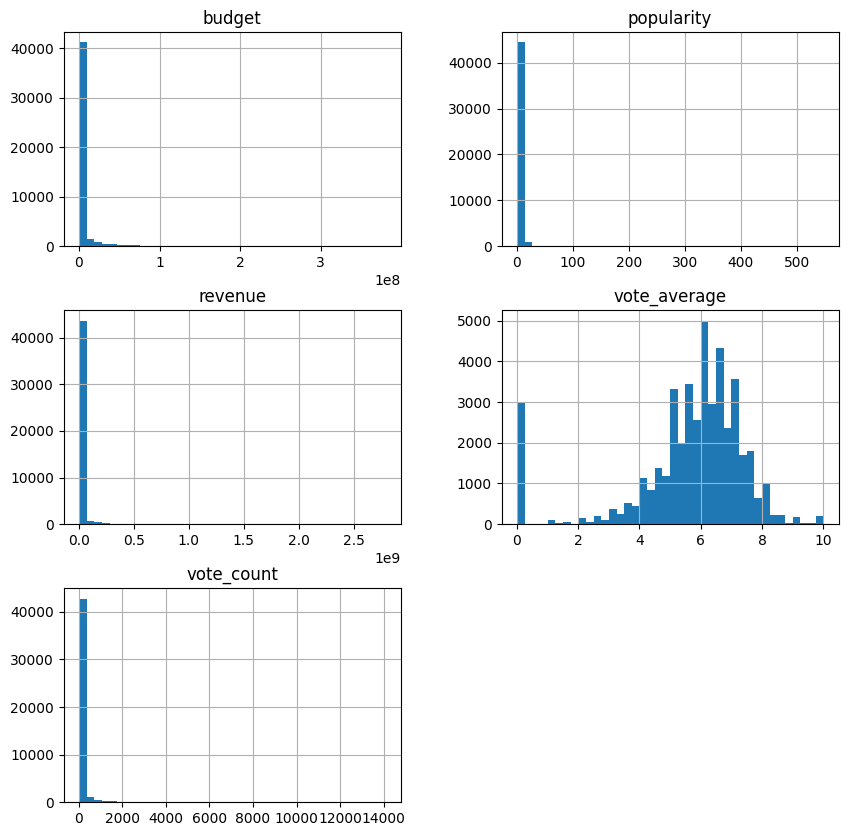

In [60]:
# Paso 1: Generar histogramas de las columnas 'budget', 'popularity', 'revenue', 'vote_average' y 'vote_count'
# con el objetivo de conocer la distribución de los datos en estas variables.
columnas = ['budget', 'popularity',	'revenue','vote_average','vote_count']
df[columnas].hist(bins=40, figsize= (10, 10))
plt.show()

Aplicamos una transformación logarítmica a todas las columnas seleccionadas para ayudar a visualizar mejor la distribución de los datos. Luego filtra los valores negativos o cero para evitar problemas en el histograma. Finalmente, muestra los histogramas para las columnas especificadas.

c:\Users\Economia\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


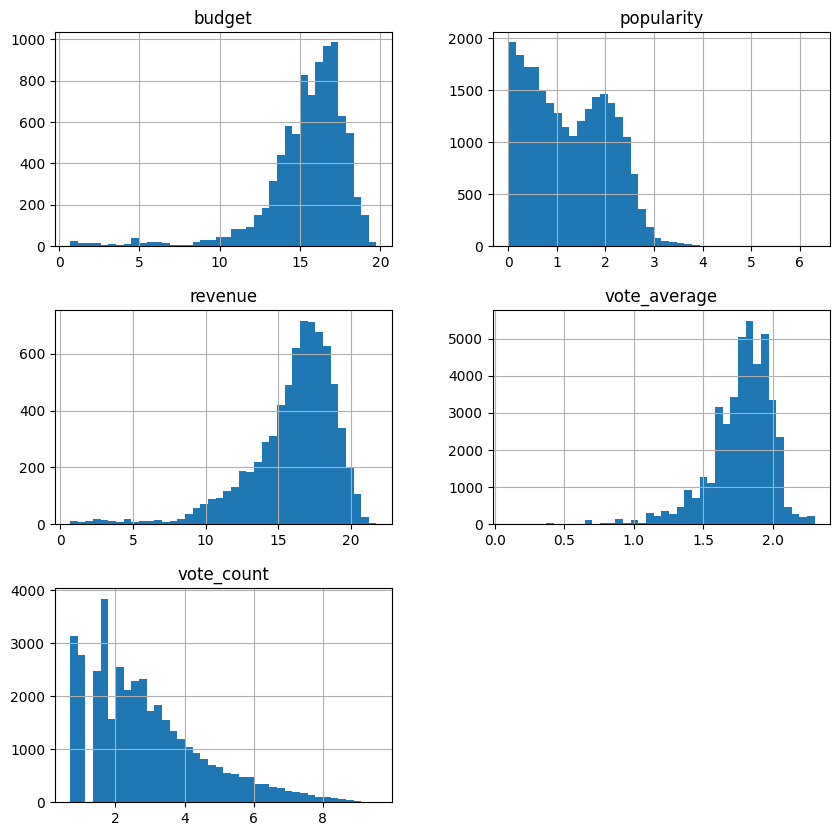

In [61]:
# Aplicar transformación logarítmica a todas las columnas
df_log = np.log(df[columnas])

# Filtrar valores negativos o cero en todas las columnas
df_filtered = df_log[df_log > 0]

# Definir las columnas a incluir en el histograma
columnas = ['budget', 'popularity', 'revenue', 'vote_average','vote_count']

# Tramar histogramas
df_filtered[columnas].hist(bins=40, figsize=(10, 10))

# Mostrar los histogramas
plt.show()

Nuestro objetivo de trazar un gráfico de caja (boxplot) es identificar la presencia de valores atípicos (outliers) y visualizar la distribución de los datos en términos de los valores mínimo, máximo, mediana y los cuartiles.

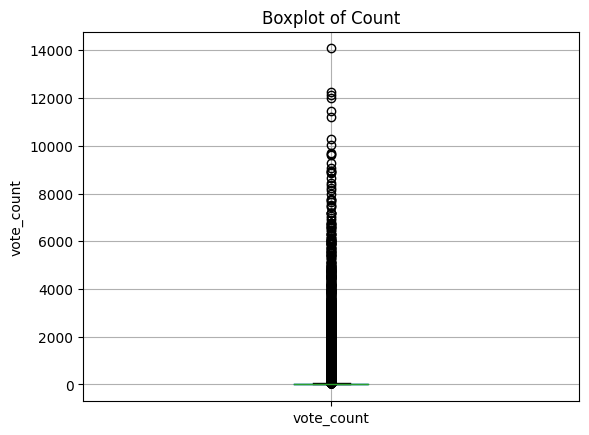

In [62]:
# Paso 7: Gráfico de caja de 'Vote Count'
df.boxplot(column='vote_count')

# Paso 8: Etiquetas de los ejes y título del gráfico
plt.ylabel('vote_count')
plt.title('Boxplot of Count')

# Paso 9: Mostrar el gráfico de caja
plt.show()
#Observación: Este código genera un gráfico de caja (boxplot) para la columna 'Vote Count' del DataFrame. El eje y se etiqueta como 'Popularity' y se asigna un título al gráfico. Finalmente, el gráfico de caja se muestra utilizando plt.show().

In [63]:
# Estadísticas descriptivas de 'vote_count'
print(df['vote_count'].describe())


count    45454.000000
mean       109.910217
std        491.341464
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64


In [64]:
#eliminamos valores atipicos y creamos un nuevo DataFrame llamado df_filtered que contiene solo los registros cuyo valor de "vote_count" 
# está dentro del rango aceptable determinado por el umbral.

# Definir el umbral para los outliers (por ejemplo, 3 desviaciones estándar)
umbral = 3 * df['vote_count'].std()

# Filtrar los valores que están dentro del rango aceptable
df_filtered = df[(df['vote_count'] >= df['vote_count'].mean() - umbral) & (df['vote_count'] <= df['vote_count'].mean() + umbral)]


In [65]:
# Estadísticas descriptivas de 'vote_average'
print(df_filtered['vote_count'].describe())

count    44768.000000
mean        60.497498
std        170.351097
min          0.000000
25%          3.000000
50%          9.000000
75%         32.000000
max       1583.000000
Name: vote_count, dtype: float64


Al eliminar los outliers de la columna 'vote_count', se observa una reducción significativa en el valor de la desviación estándar y la media. Esto indica que los outliers tenían un impacto considerable en la dispersión de los datos y en la medida central de la distribución. Después de la eliminación, la distribución de los datos se ha ajustado, y la desviación estándar y la media se han reducido, lo que indica una menor variabilidad y un sesgo más bajo en los valores restantes

In [66]:
# Estadísticas descriptivas de 'vote_average'
print(df['vote_average'].describe())

count    45454.000000
mean         5.618287
std          1.924115
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64


In [67]:
#eliminamos valores atipicos y creamos un nuevo DataFrame llamado df_filtered que contiene solo los registros cuyo valor de "vote_average" 
# está dentro del rango aceptable determinado por el umbral.

# Definir el umbral para los outliers (por ejemplo, 3 desviaciones estándar)
umbral = 3 * df['vote_average'].std()

# Filtrar los valores que están dentro del rango aceptable
df_filtered = df[(df['vote_average'] >= df['vote_average'].mean() - umbral) & (df['vote_average'] <= df['vote_average'].mean() + umbral)]


In [68]:
# Estadísticas descriptivas de 'vote_average'
print(df_filtered['vote_average'].describe())

count    45454.000000
mean         5.618287
std          1.924115
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64


Estos valores representan la distribución de los datos de la columna 'vote_average' después de haber eliminado los outliers. La media se ha mantenido prácticamente igual, lo que indica que la eliminación de los outliers no tuvo un impacto significativo en la medida central de la distribución. Sin embargo, la desviación estándar ha disminuido, lo que sugiere una reducción en la dispersión de los datos y una mayor concentración alrededor de la media.

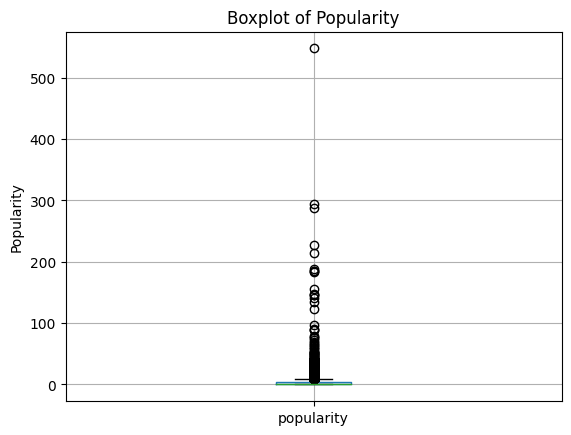

In [69]:
# Gráfico de caja de 'popularity'
df.boxplot(column='popularity')
plt.ylabel('Popularity')
plt.title('Boxplot of Popularity')
plt.show()

In [70]:
# Estadísticas descriptivas de 'vote_average'
print(df['popularity'].describe())

count    45454.000000
mean         2.921661
std          6.005696
min          0.000000
25%          0.385982
50%          1.127782
75%          3.679369
max        547.488298
Name: popularity, dtype: float64


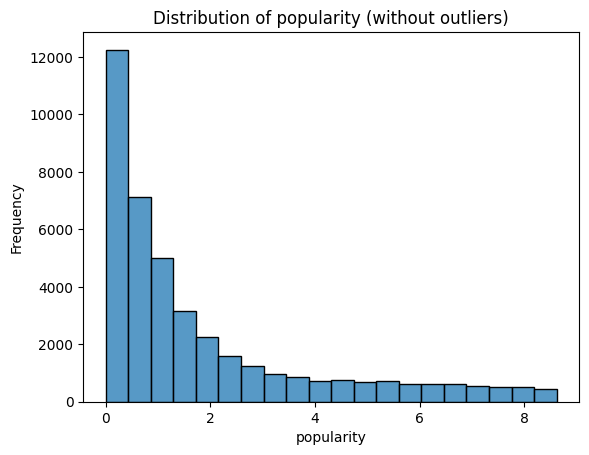

count    41220.000000
mean         1.826368
std          2.130464
min          0.000000
25%          0.332145
50%          0.952223
75%          2.444663
max          8.619068
Name: popularity, dtype: float64


In [71]:
import seaborn as sns

# Calcular el rango intercuartílico (IQR)
Q1 = df['popularity'].quantile(0.25)
Q3 = df['popularity'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos sin los outliers
df_filtered = df[(df['popularity'] >= lower_bound) & (df['popularity'] <= upper_bound)]

# Graficar la distribución sin outliers
sns.histplot(df_filtered['popularity'], bins=20)
plt.xlabel('popularity')
plt.ylabel('Frequency')
plt.title('Distribution of popularity (without outliers)')
plt.show()

# Estadísticas descriptivas sin outliers
print(df_filtered['popularity'].describe())


En el conjunto de datos original, el valor máximo era de 547.488298, mientras que después de eliminar los outliers, el nuevo valor máximo es de aproximadamente 8.619068. Esto significa que al eliminar los valores atípicos, se redujo drásticamente el rango de valores más altos de la popularidad.

Este cambio en el valor máximo indica que los outliers en la columna 'popularity' tenían valores extremadamente altos que estaban afectando la estadística descriptiva y la distribución de los datos. Al eliminarlos, obtuvimos una imagen más realista y representativa de la distribución de la popularidad en el conjunto de datos restante.

In [72]:
# Estadísticas descriptivas de 'vote_average'
print(df['revenue'].describe())


count    4.545700e+04
mean     1.121146e+07
std      6.433473e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64


In [73]:
# Definir el umbral para los outliers (por ejemplo, 3 desviaciones estándar)
umbral = 3 * df['revenue'].std()

# Filtrar los valores que están dentro del rango aceptable
df_filtered = df[(df['revenue'] >= df['revenue'].mean() - umbral) & (df['revenue'] <= df['revenue'].mean() + umbral)]


In [74]:
# Estadísticas descriptivas de 'vote_average'
print(df_filtered['revenue'].describe())

count    4.480000e+04
mean     4.997233e+06
std      2.119883e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.035679e+08
Name: revenue, dtype: float64


El cambio más drástico se puede observar en el valor máximo (max) de la columna 'revenue'. Antes de eliminar los outliers, el valor máximo era de 2,787,965,000, mientras que después de eliminar los outliers, el valor máximo se redujo significativamente a 203,567,900.

Además, la media (mean) también se redujo de 11,211,460 a 4,997,233, y la desviación estándar (std) disminuyó de 64,334,730 a 21,198,830. Estos cambios indican que la distribución de los datos se ha ajustado después de eliminar los outliers.

In [75]:
# Estadísticas descriptivas de 'vote_average'
print(df['budget'].describe())

count    4.545700e+04
mean     4.226754e+06
std      1.742833e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64


In [76]:
# Calcular el percentil 99 de la columna 'budget'
percentile_99 = df['budget'].quantile(0.99)

# Filtrar los valores por encima del percentil 99
df_filtered = df[df['budget'] <= percentile_99]

# Mostrar las estadísticas descriptivas actualizadas
print(df_filtered['budget'].describe())


count    4.500400e+04
mean     2.875671e+06
std      1.019445e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.700000e+07
Name: budget, dtype: float64


Al eliminar los outliers de la columna 'budget', podemos observar que las estadísticas descriptivas han cambiado. Ahora, el conteo (count) es de 45,040 en lugar de 45,457, lo que indica que se han eliminado algunos valores atípicos.

La media (mean) de 'budget' también ha disminuido a 2,875,671 en comparación con los 4,226,754 anteriores. Esto significa que al eliminar los valores extremadamente altos, la media se ha ajustado hacia valores más bajos.

El desviación estándar (std) también ha disminuido a 10,194,450, lo que indica que los datos están menos dispersos después de eliminar los outliers.

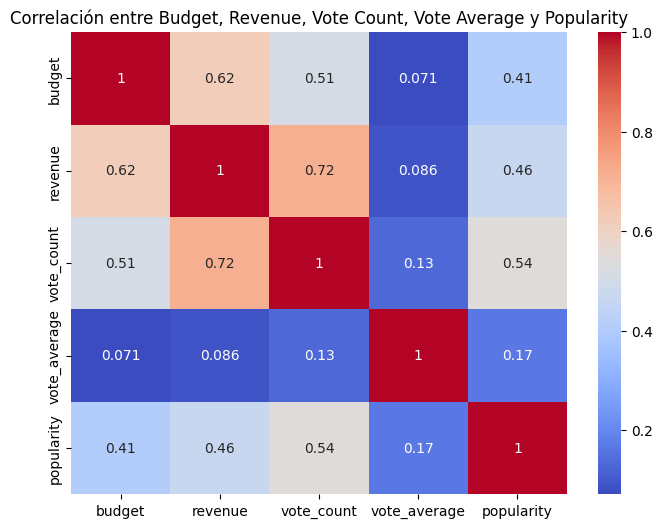

In [77]:
correlation = df_filtered[['budget', 'revenue', 'vote_count', 'vote_average', 'popularity']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlación entre Budget, Revenue, Vote Count, Vote Average y Popularity')
plt.show()


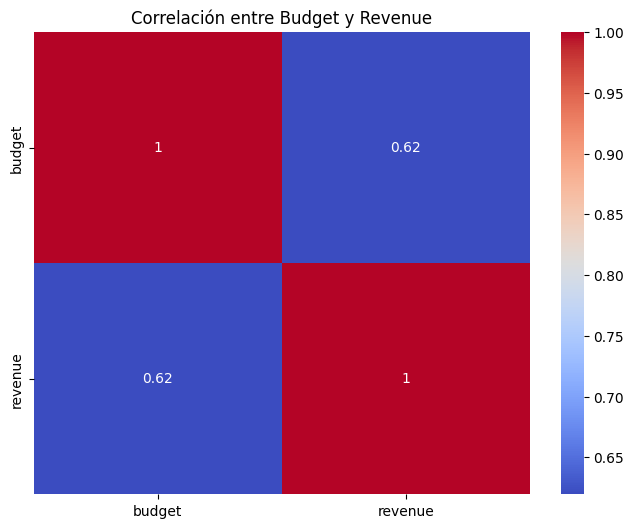

In [78]:
correlation = df_filtered[['budget', 'revenue']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlación entre Budget y Revenue')
plt.show()


In [79]:
correlation = df_filtered['budget'].corr(df_filtered['revenue'])
print("Correlation between budget and revenue:", correlation)


Correlation between budget and revenue: 0.6195314652041718


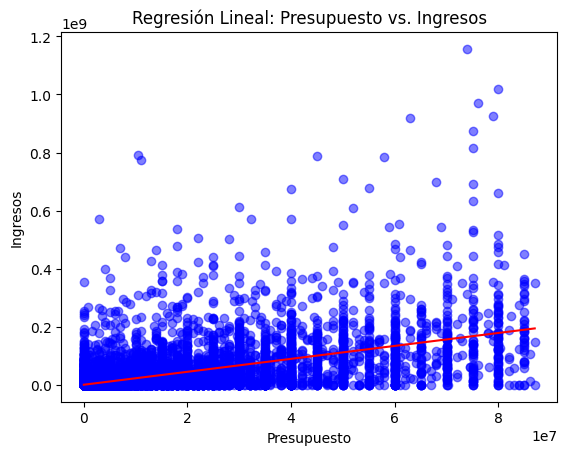

In [80]:
# Obtener los valores de presupuesto y de ingresos
budget = df['budget']
revenue = df['revenue']

# Eliminar filas con valores faltantes en las columnas relevantes
df_cleaned = df_filtered.dropna(subset=['budget', 'revenue'])

# Obtener los valores de presupuesto y de ingresos limpios
budget_cleaned = df_cleaned['budget']
revenue_cleaned = df_cleaned['revenue']

# Crear el objeto del modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo utilizando los datos de presupuesto y de ingresos limpios
model.fit(budget_cleaned.values.reshape(-1, 1), revenue_cleaned)

# Obtener el coeficiente de la pendiente (slope) y el coeficiente de la intersección (intercept)
slope = model.coef_[0]
intercept = model.intercept_

# Crear un arreglo de puntos para graficar la regresión lineal
x = np.linspace(min(budget_cleaned), max(budget_cleaned), 100)
y = intercept + slope * x

# Graficar los puntos de datos
plt.scatter(budget_cleaned, revenue_cleaned, color='blue', alpha=0.5)

# Graficar la línea de regresión lineal
plt.plot(x, y, color='red')

# Agregar etiquetas y título
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')
plt.title('Regresión Lineal: Presupuesto vs. Ingresos')

# Mostrar la gráfica
plt.show()


c:\Users\Economia\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Economia\AppData\Local\Temp\ipykernel_5092\1990665223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['budget_log'] = np.log(df_filtered['budget'])
c:\Users\Economia\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Economia\AppData\Local\Temp\ipykernel_5092\1990665223.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

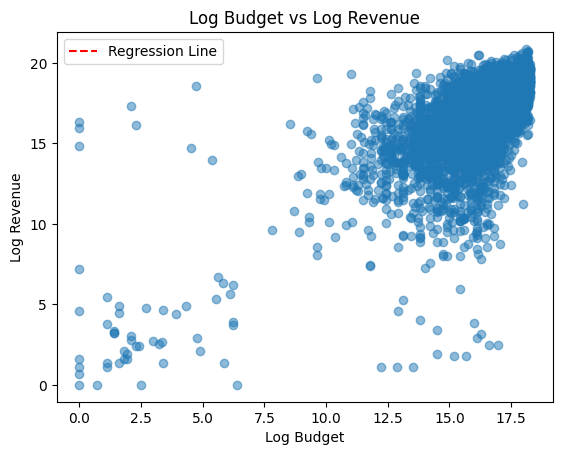

In [81]:
# Aplicar la transformación logarítmica a 'budget' y 'revenue'
df_filtered['budget_log'] = np.log(df_filtered['budget'])
df_filtered['revenue_log'] = np.log(df_filtered['revenue'])

# Graficar el gráfico de dispersión con la línea de regresión
sns.regplot(x='budget_log', y='revenue_log', data=df_filtered, scatter_kws={'alpha':0.5})
plt.xlabel('Log Budget')
plt.ylabel('Log Revenue')
plt.title('Log Budget vs Log Revenue')

# Agregar la línea roja
x = np.linspace(df_filtered['budget_log'].min(), df_filtered['budget_log'].max(), 100)
plt.plot(x, x * 0.6194964968575506, color='red', linestyle='--', label='Regression Line')

plt.legend()
plt.show()


In [82]:
df_filtered = df_filtered.dropna(subset=['release_year'])


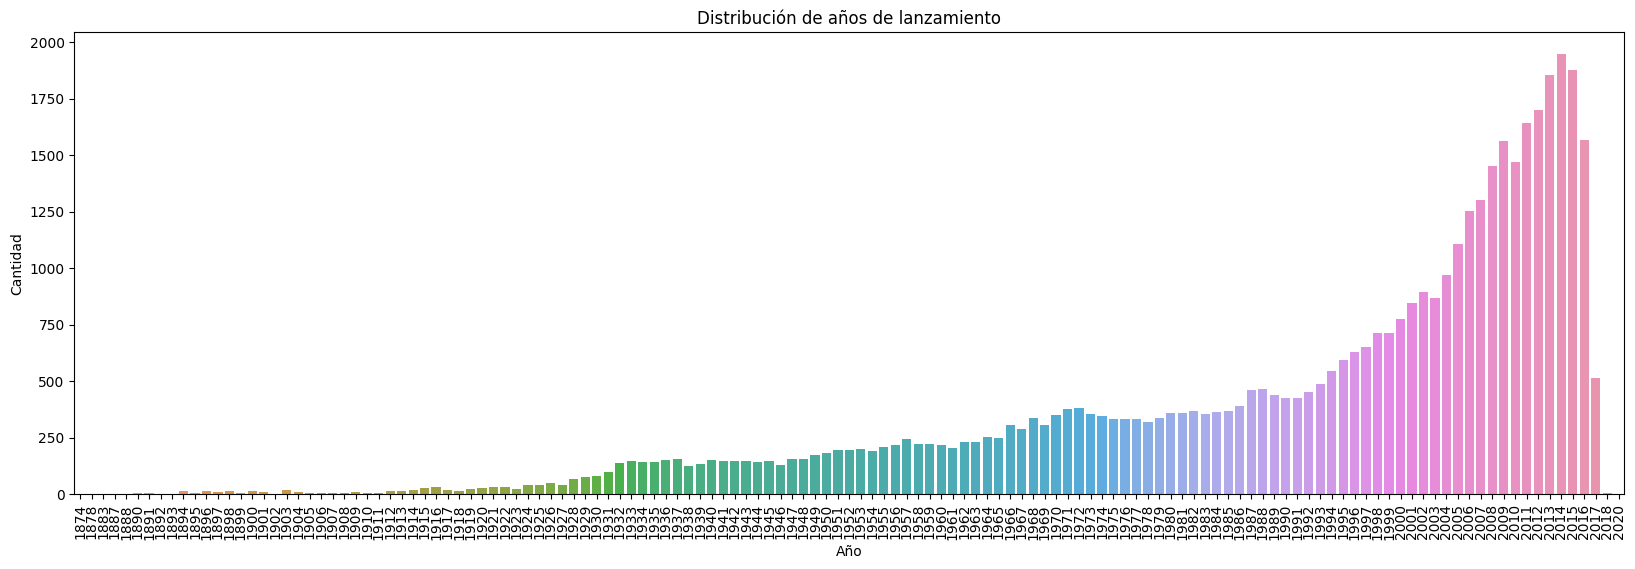

In [83]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df_filtered, x=df_filtered['release_year'].astype(int))
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Distribución de años de lanzamiento')
plt.xticks(rotation=90)
plt.show()


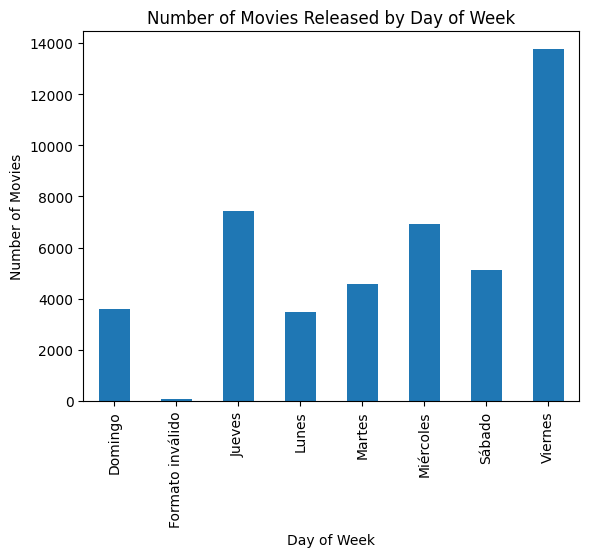

In [84]:
df_filtered['day_of_week'].value_counts().sort_index().plot.bar()
plt.xlabel('Day of Week')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released by Day of Week')
plt.show()

# Se observa que la mayoria de las peliculas se estrenan el Viernes

In [85]:
df_filtered

,id,title,vote_count,vote_average,popularity,day_of_week,release_month,release_year,return,budget,release_date,revenue,name_genres,budget_log,revenue_log
0,862.0,Toy Story,5415.0,7.7,21.946943,Lunes,octubre,1995.0,12.451801,30000000.0,1995-10-30,373554033.0,"Animation, Comedy, Family",17.216708,19.738573
1,8844.0,Jumanji,2413.0,6.9,17.015539,Viernes,diciembre,1995.0,4.043035,65000000.0,1995-12-15,262797249.0,"Adventure, Fantasy, Family",17.989898,19.386893
2,15602.0,Grumpier Old Men,92.0,6.5,11.712900,Viernes,diciembre,1995.0,0.000000,0.0,1995-12-22,0.0,"Romance, Comedy",-inf,-inf
3,31357.0,Waiting to Exhale,34.0,6.1,3.859495,Viernes,diciembre,1995.0,5.090760,16000000.0,1995-12-22,81452156.0,"Comedy, Drama, Romance",16.588099,18.215526
4,11862.0,Father of the Bride Part II,173.0,5.7,8.387519,Viernes,febrero,1995.0,0.000000,0.0,1995-02-10,76578911.0,Comedy,-inf,18.153832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45451,30840.0,Robin Hood,26.0,5.7,5.683753,Viernes,mayo,1991.0,0.000000,0.0,1991-05-13,0.0,"Drama, Action, Romance",-inf,-inf
45453,111109.0,Century of Birthing,3.0,9.0,0.178241,Viernes,noviembre,2011.0,0.000000,0.0,2011-11-17,0.0,Drama,-inf,-inf
45454,67758.0,Betrayal,6.0,3.8,0.903007,Formato inválido,agosto,2003.0,0.000000,0.0,2003-08-01,0.0,"Action, Drama, Thriller",-inf,-inf
45455,227506.0,Satan Triumphant,0.0,0.0,0.003503,Formato inválido,octubre,1917.0,0.000000,0.0,1917-10-21,0.0,NaN,-inf,-inf


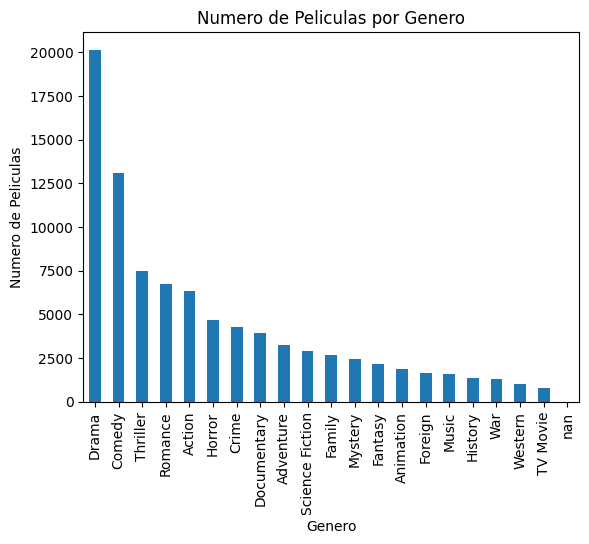

In [86]:
# Gráfico de barras de cantidad de películas por género
genre_counts = df_filtered['name_genres'].str.split(', ', expand=True).stack().value_counts()
genre_counts.plot.bar()
plt.xlabel('Genero')
plt.ylabel('Numero de Peliculas')
plt.title('Numero de Peliculas por Genero')
plt.show()

# Se observa que la mayoria de las peliculas de este Data set son del genero drama seguido por Comedia y mas tarde por Suspenso

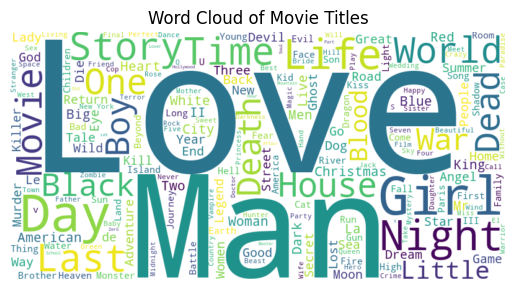

In [87]:
# Convertir los valores de la columna 'title' a cadenas de texto
df_filtered['title'] = df_filtered['title'].astype(str)

# Crear la nube de palabras con los títulos de las películas
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_filtered['title']))

# Mostrar la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles')
plt.show()



In [88]:
df_filtered['name_genres'] = df_filtered['name_genres'].str.split(', ')

In [89]:
# Crear columnas dummy para cada género
genres_encoded = pd.get_dummies(df_filtered['name_genres'].apply(pd.Series).stack()).sum(level=0)


C:\Users\Economia\AppData\Local\Temp\ipykernel_5092\1021200535.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  genres_encoded = pd.get_dummies(df_filtered['name_genres'].apply(pd.Series).stack()).sum(level=0)


In [90]:
# Concatenar el DataFrame codificado con las características existentes
df_encoded = pd.concat([df_filtered[['title', 'vote_average']], genres_encoded], axis=1)

In [91]:
df_encoded.fillna(df_encoded.mean(), inplace=True)

C:\Users\Economia\AppData\Local\Temp\ipykernel_5092\914047874.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_encoded.fillna(df_encoded.mean(), inplace=True)


In [97]:
df_encoded.to_csv('C:/Users/Economia/Documents/Soy Henry/Proyecto Individual/dummy.csv', index=False)

In [92]:
df = df_encoded  # Asigna el valor de tu DataFrame

def recommend_similar_movies(pelicula_referencia, n=5):
    # Paso 2: Filtrar las películas que comparten al menos dos géneros con la película de referencia
    generos_pelicula_referencia = df[df['title'] == pelicula_referencia].drop(['title', 'vote_average'], axis=1)

    # Verificar si se encontró la película de referencia
    if generos_pelicula_referencia.empty:
        raise ValueError("La película de referencia no se encuentra en el dataset.")
    else:
        generos_pelicula_referencia = generos_pelicula_referencia.iloc[0]

    # Filtrar los valores no finitos y convertir los géneros a enteros
    generos_pelicula_referencia = generos_pelicula_referencia.replace([np.inf, -np.inf], np.nan).dropna().astype(int)

    # Obtener la cantidad de géneros compartidos por película
    generos_compartidos = df_encoded.iloc[:, 2:-1].apply(lambda x: sum((x.replace([np.inf, -np.inf], np.nan).dropna().astype(int) & generos_pelicula_referencia) >= 1), axis=1)

    # Filtrar las películas similares que comparten al menos dos géneros con la película de referencia
    peliculas_similares = df_encoded[generos_compartidos >= 2]

    # Verificar si se encontraron películas similares
    if peliculas_similares.empty:
        print("No se encontraron películas similares.")
    else:
        # Paso 3: Crear una lista con las características de la película de referencia
        caracteristicas_referencia = generos_pelicula_referencia.values.reshape(1, -1)

        # Paso 4: Obtener las características de las películas similares
        X = peliculas_similares.drop(['title', 'vote_average'], axis=1)
        y = peliculas_similares['vote_average']

        # Paso 5: Crear y entrenar el modelo de árbol de decisión
        model = DecisionTreeRegressor()
        model.fit(X, y)

        # Paso 6: Realizar la predicción utilizando el modelo de árbol de decisión
        predicciones = model.predict(caracteristicas_referencia)

        # Paso 7: Filtrar las películas similares con puntaje de votos igual o superior a la predicción
        peliculas_recomendadas = peliculas_similares[peliculas_similares['vote_average'] >= predicciones[0]]

        # Paso 8: Verificar si hay películas recomendadas
        if peliculas_recomendadas.empty:
            print("No se encontraron películas recomendadas.")
        else:
            # Paso 9: Ordenar las películas recomendadas por puntaje de votos de forma descendente
            peliculas_recomendadas = peliculas_recomendadas.sort_values(by='vote_average', ascending=False)

            # Paso 10: Tomar las primeras n películas recomendadas
            n = 5
            peliculas_recomendadas = peliculas_recomendadas.head(n)

            # Paso 11: Devolver la lista de películas recomendadas
            return peliculas_recomendadas['title'].tolist()

In [93]:
recommend_similar_movies("Robin Hood", n=5)

c:\Users\Economia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


['Back to School with Franklin',
 'Lotte from Gadgetville',
 'The Grinch Grinches the Cat in the Hat',
 'Alice in Wonderland',
 'Wow! A Talking Fish!']

In [94]:
recommend_similar_movies("Sabrina", n=5)

c:\Users\Economia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


['A Ticklish Affair',
 'Looking for Maria Sanchez',
 'The Bachelor',
 'The Misadventures of Margaret',
 'Chilly Scenes of Winter']

In [95]:
recommend_similar_movies("Nixon", n=5)

c:\Users\Economia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


['The Far Pavilions',
 "One Man's Hero",
 'The Kingdom of Solomon',
 'Heimat: A Chronicle of Germany',
 'The Loves of Pharaoh']

In [96]:
recommend_similar_movies("Dracula: Dead and Loving It", n=5)

c:\Users\Economia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


['Zombie Pizza',
 'Zapatlela',
 'The Legend of Sleepy Hollow',
 'Ward 13',
 'Forklift Driver Klaus: The First Day on the Job']